In [34]:
import sys  
sys.path.insert(1, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils import input_output_layer_sizes, predict, nn_model, tanh, sigmoid, leaky_relu, relu, linear, randomly_initialize_parameters, metrics

In [35]:
df = pd.read_csv("../dataset/apple_quality.csv")
df

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,good
1,1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,good
2,2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,bad
3,3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,good
4,4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,good
...,...,...,...,...,...,...,...,...,...
3995,3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784,bad
3996,3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235,good
3997,3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611,bad
3998,3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229720,good


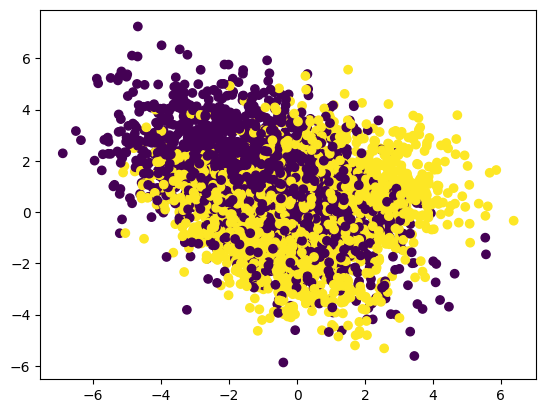

In [36]:
# Plot data 
plt.scatter(df["Sweetness"], df["Ripeness"], c=df["Quality"] == "good")

In [37]:
X_df = df.iloc[:, 1:-1]
y_df = df.iloc[:, -1]
y_df = y_df == "good"

X = X_df.values
y = y_df.values

In [38]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(test_size=0.5, random_state=42, n_splits=1)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
sss = StratifiedShuffleSplit(test_size=0.5, random_state=42, n_splits=1)

for test_index, dev_index in sss.split(X_test, y_test):
    X_test, X_dev = X[test_index], X[dev_index]
    y_test, y_dev = y[test_index], y[dev_index]


In [50]:
X_train = X_train.T
y_train = y_train.reshape(1, -1)

X_test = X_test.T
y_test = y_test.reshape(1, -1)

X_dev = X_dev.T
y_dev = y_dev.reshape(1, -1)

(7, 1000)

In [40]:
import pickle

In [41]:
n_x, n_y = input_output_layer_sizes(X_train, y_train)
layer_dims = [n_x, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, n_y]
activations = [relu, tanh, leaky_relu, tanh, tanh, relu, relu,  tanh, leaky_relu, tanh, relu, sigmoid]
parameters = randomly_initialize_parameters(layer_dims)

# try:
#     fp = open('parameters.pkl', 'rb')
#     parameters = pickle.load(fp)
# except SystemError:
#     parameters = randomly_initialize_parameters(layer_dims)

parameters, costs = nn_model(X_train, y_train, layer_sizes=layer_dims, parameters= parameters, activations=activations, print_cost=True, number_of_iterations=32000, learning_rate=0.075)
parameters

Cost after iteration 0: 0.697095
Cost after iteration 100: 0.387603
Cost after iteration 200: 0.274629
Cost after iteration 300: 0.224146
Cost after iteration 400: 0.252397
Cost after iteration 500: 0.151661
Cost after iteration 600: 0.124978
Cost after iteration 700: 0.104976
Cost after iteration 800: 0.081034
Cost after iteration 900: 0.065351
Cost after iteration 1000: 0.051161
Cost after iteration 1100: 0.040750
Cost after iteration 1200: 0.039091
Cost after iteration 1300: 0.032895
Cost after iteration 1400: 0.033881
Cost after iteration 1500: 0.027929
Cost after iteration 1600: 0.031835
Cost after iteration 1700: 0.020642
Cost after iteration 1800: 0.018105
Cost after iteration 1900: 0.016271
Cost after iteration 2000: 0.015282
Cost after iteration 2100: 0.027556
Cost after iteration 2200: 0.013937
Cost after iteration 2300: 0.012245
Cost after iteration 2400: 0.040013
Cost after iteration 2500: 0.010128
Cost after iteration 2600: 0.009022
Cost after iteration 2700: 0.008598
Cost

{'W1': array([[ 0.75382352, -0.27589759, -0.32025574, -0.48028965,  0.19788675,
         -0.92718094,  0.50736129],
        [-0.07312885, -0.12624243,  0.1517832 ,  0.46935472, -0.88813388,
         -0.24556521, -0.23353572],
        [ 0.46320728, -0.58597696, -0.14016767, -0.10082175, -0.01608506,
          0.20688302, -0.37624668],
        [ 0.68696257,  0.28328028,  0.23085572,  0.25698041, -0.14411997,
         -0.17219039, -0.46947975],
        [-0.15225521,  0.20384543, -0.16535212, -0.17117642, -0.2427927 ,
         -0.35587593, -0.25868409],
        [-0.261189  , -0.53253361,  0.03009062,  0.71616504,  0.30642959,
         -0.20987954, -0.30176284],
        [-0.11757547,  0.8016697 ,  0.4542702 , -0.38125482,  0.18250002,
          0.78150002, -0.01927562],
        [ 0.30223926,  0.27861816, -0.0292396 , -0.65728377, -0.03880005,
          0.07525008,  0.19804574],
        [ 0.28654143,  0.28705111,  0.07327827,  0.3984467 , -0.213604  ,
          0.78713162,  0.40476464],
    

In [42]:
# save dictionary to person_data.pkl file
with open('parameters.pkl', 'wb') as fp:
    pickle.dump(parameters, fp)
    print('Parameters saved successfully to file')

Parameters saved successfully to file


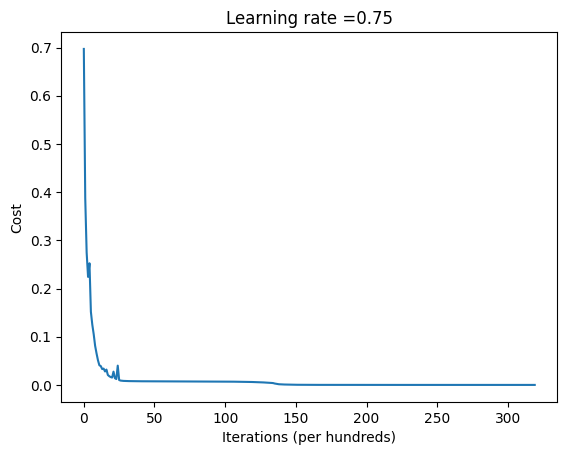

In [43]:
from helper_functions import plot_learning_curve

plot_learning_curve(costs, 0.75)

In [44]:
from sklearn.metrics import precision_score

# Print train accuracy
train_predictions = predict(parameters, activations, X_train, decision_rate=0.5)

precision = precision_score(y_train.T, train_predictions.T)
print(f"Train Precision: {precision * 100}%")

Train Precision: 100.0%


In [47]:
# Print dev accuracy
dev_predictions = predict(parameters, activations, X_dev, decision_rate=0.5)

precision = precision_score(y_dev.T, dev_predictions.T)
print(f"Dev Precision: {precision * 100}%")

Dev Precision: 96.49805447470817%


In [48]:
test_predictions = predict(parameters, activations, X_test, decision_rate=0.5)

precision = precision_score(y_test.T, test_predictions.T)
print(f"Test Precision: {precision * 100}%")

Test Precision: 96.30390143737166%
